In [1]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import random

In [2]:
points_group1 = np.random.random((50,2)) + [0.75, 0.75]
points_group2 = np.random.random((50,2))
points_group3 = np.random.random((50,2)) + [0.75,0]
points = np.vstack((points_group1, points_group2, points_group3))

In [3]:
num_clusters = 3
rand_inds = random.sample(range(points.shape[0]), num_clusters)
centroids = points[rand_inds]

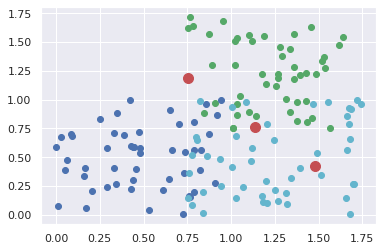

In [4]:
plt.scatter(points_group1[:,0], points_group1[:,1], c="g")
plt.scatter(points_group2[:,0], points_group2[:,1], c="b")
plt.scatter(points_group3[:,0], points_group3[:,1], c="c")
plt.scatter(centroids[:,0], centroids[:,1], c="r", s=100)

plt.show()

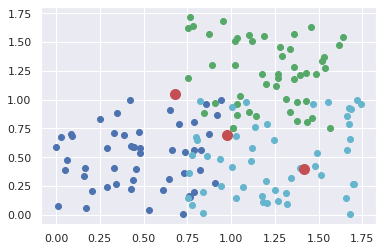

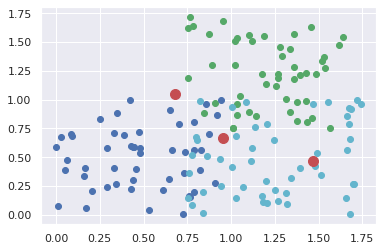

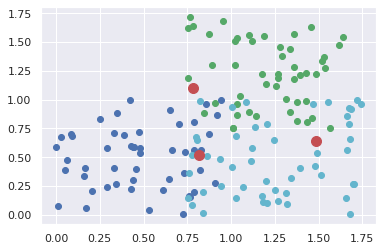

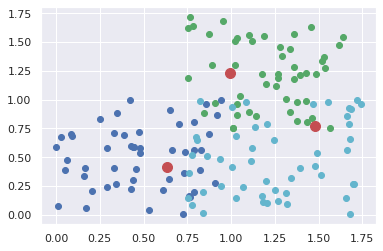

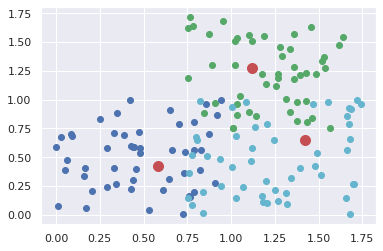

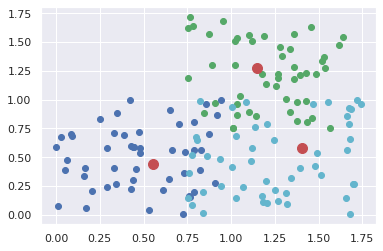

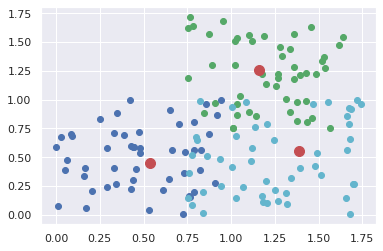

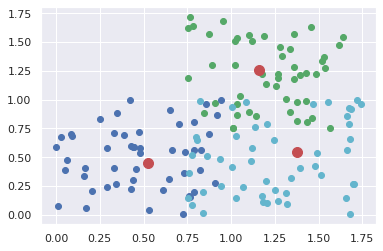

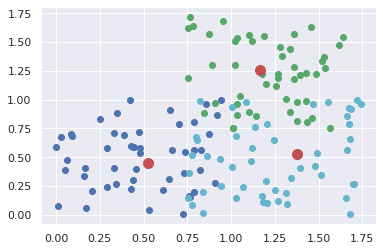

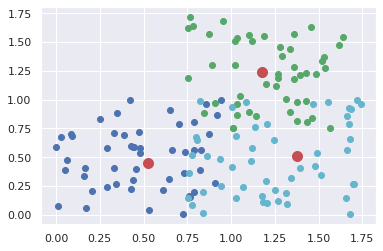

In [5]:
for i in range(10):
    distance = np.sqrt(((points[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    closest = np.argmin(distance, axis=1)
    centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    plt.figure()
    plt.scatter(points_group1[:,0], points_group1[:,1], c="g")
    plt.scatter(points_group2[:,0], points_group2[:,1], c="b")
    plt.scatter(points_group3[:,0], points_group3[:,1], c="c")
    plt.scatter(centroids[:,0], centroids[:,1], c="r", s=100)
    plt.show()

<IPython.core.display.Javascript object>


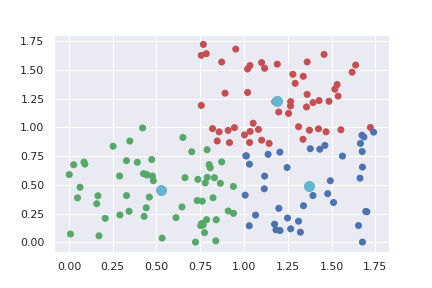

In [6]:
%matplotlib nbagg
# from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-0.5, 2), ylim=(-0.5, 2))

def init():
    return

def animate(i):
    global centroids
    distance = distance = np.sqrt(((points[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    closest = np.argmin(distance, axis=1)
    centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    closest = ["r" if x == 1 else ( "g" if x == 0 else "b") for x in closest]
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='c', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)